In [ ]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
from scipy.optimize import differential_evolution, minimize
import matplotlib.pyplot as plt

air = ml.Non_Dispersion(1)
OC = ml.open_material('OC_LENS', 'Material')
SiO2 = ml.open_material('SiO2_LENS', 'Sellmeier') 
SiN = ml.open_material('SiN_LENS', 'Sellmeier')
ITO = ml.open_material('ITO_LENS', 'Sellmeier')
sodalime = ml.open_material('sodalime', 'Material')

R_scan = pd.read_csv('./spectrum/LENS/rev1/R_5_B.csv')['SCAN'].values
wl = np.linspace(400, 700, 301)

In [23]:
# th就是要fit的對象
R_hypo = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, 5)

fom = lambda th:sum(abs(100*R_hypo(th)-R_scan))

In [25]:
sol = differential_evolution(
    fom, [
        (1000,2400),(2,80),(2,80),(20,30),(20,80),(4,80) # nm
    ], disp=True, polish=False, popsize=15, mutation=0.3, recombination=0.9, strategy='best1bin'
)
print(sol.x)

differential_evolution step 1: f(x)= 404.75
differential_evolution step 2: f(x)= 252.244
differential_evolution step 3: f(x)= 232.968
differential_evolution step 4: f(x)= 217.056
differential_evolution step 5: f(x)= 205.635
differential_evolution step 6: f(x)= 196.192
differential_evolution step 7: f(x)= 182.618
differential_evolution step 8: f(x)= 180.888
differential_evolution step 9: f(x)= 179.948
differential_evolution step 10: f(x)= 178.486
differential_evolution step 11: f(x)= 177.631
differential_evolution step 12: f(x)= 177.088
[2128.27521211   13.71647552   40.36214178   28.69385825   49.31026935
    7.42494893]


In [34]:
m1 = [1712.70252975,16.60958357,31.22948534,31.,36.28899155,9.75257661]
m2 = [1709.83443976,20.8817858,21.54939596,57.01125283,32.74004512,11.92598334]
m3 = [1711.6,18.57,29.44,3.99993161e+01,3.72474488e+01,1.07195078e+01,2.29851979e-01]

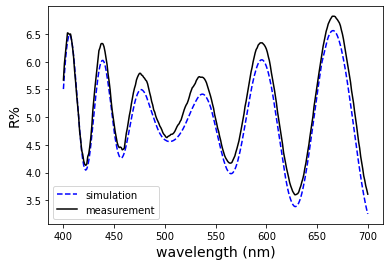

0.2500522637108891


In [36]:
tk = m3

plt.plot(wl, 100*R_hypo(tk), '--b', label = 'simulation')
plt.plot(wl, R_scan, '-k', label = 'measurement')

plt.legend(loc = 'best')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
#plt.savefig('LENS_rev1_reflection_blacktap.png')
plt.show()
print(tm.RMSE(100*R_hypo(tk), R_scan))